In [1]:
import datetime
import matplotlib.pyplot as plt
import multiprocessing
import numpy as np
import os
import pandas as pd
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit

In [2]:
from gendis.genetic import GeneticExtractor

/home/samir/miniconda3/envs/gendis/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
df = pd.read_csv('data/sin_synth/SIN_RANDY_NONOISE_500.csv')

In [4]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,142,143,144,145,146,147,148,149,error,label
0,176.107856,-38.292281,-83.633367,-130.510875,45.917780,-198.701307,27.789212,-14.355077,32.489286,38.293906,...,8.267257,115.987310,-16.361367,-16.296124,-0.519341,57.189860,-62.385178,163.477655,0.593159,0.0
1,100.961410,114.652989,16.501596,122.400534,269.075282,-11.194462,137.764530,-120.118107,-106.206571,236.171774,...,1.452680,-64.936704,-53.720485,10.504204,-19.586896,50.286487,-69.378273,127.678153,0.460127,0.0
2,-34.271320,48.175821,107.899320,-52.795608,30.277780,-41.432483,34.452543,6.573040,-63.255035,14.422148,...,-47.087189,110.905690,-39.843555,-41.198753,25.415166,23.234761,158.668992,-177.656889,0.377501,0.0


In [5]:
df.error.describe()

count    500.000000
mean       0.700083
std        0.210911
min        0.200191
25%        0.500853
50%        0.767173
75%        0.898267
max        0.996475
Name: error, dtype: float64

In [6]:
df.label.value_counts()

1.0    250
0.0    250
Name: label, dtype: int64

In [7]:
len(df)

500

In [8]:
df = df.drop(columns='error')
#X = df.drop(columns=['sin_x0', 'sin_x1', 'sin_y', 'label'])
X = df.drop(columns=['label'])
y = df['label']

In [9]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.8, random_state=0)
sss.get_n_splits(X, y)
train_index, test_index = next(sss.split(X, y))

X_train, y_train = X.iloc[train_index], y.iloc[train_index]
X_test, y_test = X.iloc[test_index], y.iloc[test_index]

In [10]:
from gendis.fitness import logloss_fitness

args = {
    "dist_function": "original",
    "fitness": logloss_fitness,
    "apply_differencing": False,
    "population_size": 100,
    "max_shaps": 5,
    "iterations": 50,  
    "mutation_prob": 0.3, 
    "crossover_prob": 0.3, 
    "wait": 20, 
    "n_jobs": multiprocessing.cpu_count()-3,
    "verbose": True,
} 

gendis = GeneticExtractor(**args)

In [11]:
gendis.__dict__

{'dist_function': <cyfunction _pdist at 0x753906fcdba8>,
 'dist_func_returns': False,
 'fitness': <function gendis.fitness.logloss_fitness(D, y, verbose=False)>,
 'apply_differencing': False,
 'population_size': 100,
 'iterations': 50,
 'verbose': True,
 'mutation_prob': 0.3,
 'crossover_prob': 0.3,
 'plot': None,
 'wait': 20,
 'n_jobs': 13,
 'normed': False,
 'min_len': 0,
 'max_len': None,
 'max_shaps': 5,
 'init_ops': [<function gendis.operators.random_shapelet(X, n_shapelets, min_len_series, max_len, min_len=4)>,
  <function gendis.operators.kmeans(X, n_shapelets, min_len_series, max_len, n_draw=None, min_len=4)>],
 'cx_ops': [<function gendis.operators.merge_crossover(ind1, ind2, p=0.25)>,
  <function gendis.operators.point_crossover(ind1, ind2)>,
  <function gendis.operators.shap_point_crossover(ind1, ind2, p=0.25)>],
 'mut_ops': [<function gendis.operators.add_shapelet(shapelets, toolbox)>,
  <function gendis.operators.remove_shapelet(shapelets, toolbox)>,
  <function gendis.ope

In [12]:
%%time
gendis.fit(X_train, y_train)

it		avg		std		max		time
1		-0.5883		0.066		-0.375319	1.4326
2		-0.5405		0.099		-0.207064	1.7871
3		-0.471		0.117		-0.166297	2.1445
4		-0.3897		0.124		-0.144042	2.8541
5		-0.3054		0.119		-0.129644	3.0672
6		-0.2531		0.092		-0.119365	3.5727
7		-0.1917		0.075		-0.074339	3.3362
8		-0.1579		0.069		-0.061094	4.5087
9		-0.137		0.078		-0.038354	2.9126
10		-0.1027		0.047		-0.013236	3.2013
11		-0.0812		0.072		-0.001638	3.6174
12		-0.0475		0.061		-0.000382	4.3363
13		-0.0336		0.062		-0.000274	3.9491
14		-0.0167		0.039		-0.000274	3.6995
15		-0.0105		0.03		-0.000274	4.2687
16		-0.0072		0.024		-0.000206	4.2442
17		-0.0105		0.04		-0.000133	4.3757
18		-0.0025		0.018		-0.000133	4.2956
19		-0.0035		0.013		-9.5e-05	4.6716
20		-0.0032		0.015		-7.8e-05	3.9
21		-0.0015		0.006		-7.8e-05	4.0348
22		-0.0057		0.029		-7.8e-05	3.1748
23		-0.0091		0.034		-5.5e-05	4.3215
24		-0.0082		0.032		-5.1e-05	3.5041
25		-0.0031		0.02		-5.1e-05	3.1815
26		-0.0042		0.027		-3.9e-05	3.2218
27		-0.0071		0.026		-3.9e-05	3.5018
28	

In [13]:
%%time
distances_train = gendis.transform(X_train)
distances_test = gendis.transform(X_test)

CPU times: user 2.25 s, sys: 30 µs, total: 2.25 s
Wall time: 2.25 s


In [14]:
dists = pd.DataFrame(distances_train)
dists.head()

,0,1,2,3,4,5,6
0,234.355576,279.118896,116.404465,706.694214,286.134888,44.433167,341.899597
1,293.018372,276.308838,127.446831,644.530212,308.514587,44.989613,259.130463
2,305.770538,183.261398,138.074509,694.707153,330.849030,71.817650,713.357605
3,288.427490,259.463440,163.159454,601.698975,280.489349,74.307091,790.387085
4,116.412041,257.151459,112.921631,535.504883,234.333023,47.380817,718.518250


In [15]:
dists["label"] = y_train.values
dists["label"].value_counts()
dists.index = X_train.index
#dists[['sin_x0', 'sin_x1', 'sin_y', 'label']] = df[['sin_x0', 'sin_x1', 'sin_y', 'label']]

In [16]:
def test_shapelet_separation(shap, shap_id):
    axs_multiplier = 0.75
    f, axs = plt.subplots(1, 2, figsize=(2*axs_multiplier*6.4, axs_multiplier*4.8))
    print(f"Testing separation for shapelet {shap_id}")
    
    # Shapelet plot
    axs[0].plot(shap)
    
    # Distance histograms plot
    bins = np.linspace(0, 120, 20)
    axs[1].hist(dists.loc[dists['label']==0, shap_id], alpha=0.5, label='sin=false')
    axs[1].hist(dists.loc[dists['label']==1, shap_id], alpha=0.5, label='sin=true')
    axs[1].legend(loc='upper right')
    
    # Distance versus sin_y
    #dists.plot.scatter(x='sin_y', y=shap_id, c='DarkBlue', ax=axs[2])
    
    
    # Accuracy using the shapelet as feature
    single_shapelet_train = distances_train[:, shap_id].reshape(-1, 1)
    single_shapelet_test = distances_test[:, shap_id].reshape(-1, 1)
    
    lr = LogisticRegression()
    lr.fit(single_shapelet_train, y_train)
    y_pred = lr.predict(single_shapelet_test)
    acc = accuracy_score(y_test, y_pred)
    print(f'Accuracy = {acc}')
    print(confusion_matrix(y_test, y_pred))
    
    plt.show()

Testing separation for shapelet 0
Accuracy = 0.56
[[109  91]
 [ 85 115]]


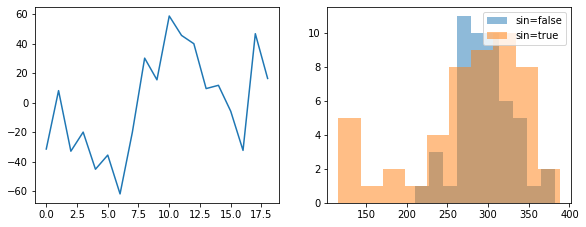

Testing separation for shapelet 1
Accuracy = 0.515
[[ 85 115]
 [ 79 121]]


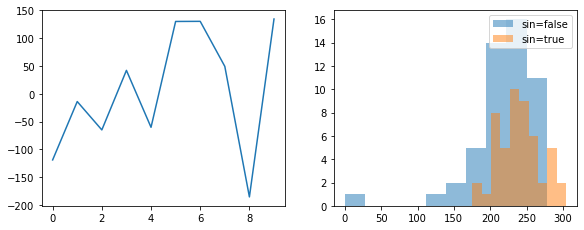

Testing separation for shapelet 2
Accuracy = 0.41
[[ 82 118]
 [118  82]]


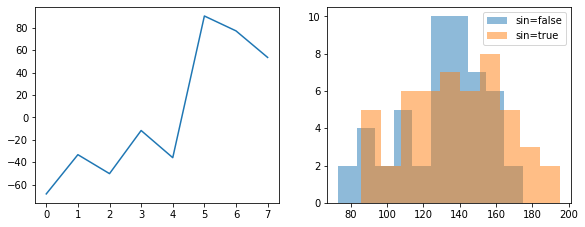

Testing separation for shapelet 3
Accuracy = 0.69
[[164  36]
 [ 88 112]]


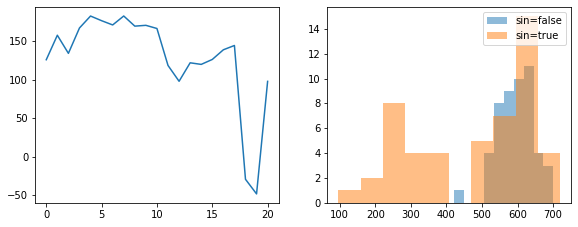

Testing separation for shapelet 4
Accuracy = 0.5
[[200   0]
 [200   0]]


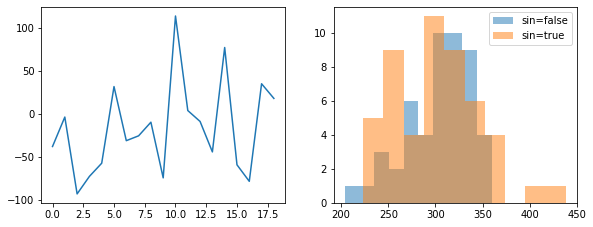

Testing separation for shapelet 5
Accuracy = 0.5225
[[ 96 104]
 [ 87 113]]


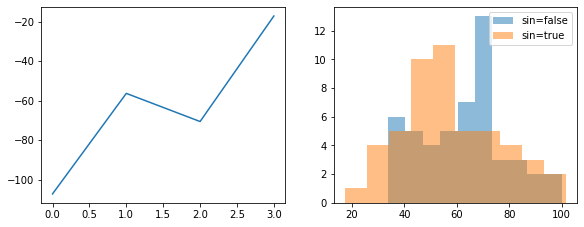

Testing separation for shapelet 6
Accuracy = 0.685
[[175  25]
 [101  99]]


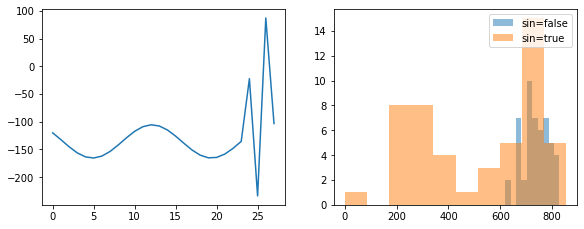

In [17]:
for i, shap in enumerate(gendis.best['shapelets'], start=0):
    test_shapelet_separation(shap, i)

## Manually input sin shapelet

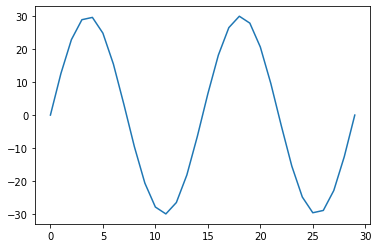

In [18]:
sin_length = 30
t = np.linspace(0, 4*np.pi, sin_length)
sine_wave = 30 * np.sin(t)
plt.plot(sine_wave)

In [19]:
%%time
gendis.best['shapelets'] = [sine_wave]
dist_sin_train = gendis.transform(X_train)
dist_sin_test = gendis.transform(X_test)

CPU times: user 304 ms, sys: 5 µs, total: 304 ms
Wall time: 304 ms


In [20]:
lr = LogisticRegression()
lr.fit(dist_sin_train, y_train)
y_pred = lr.predict(dist_sin_test)
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy = {acc}')
print(confusion_matrix(y_test, y_pred))

Accuracy = 0.66
[[151  49]
 [ 87 113]]


In [21]:
dist_sin_train = pd.DataFrame(dist_sin_train)
dist_sin_train["label"] = y_train.values
dist_sin_train["label"].value_counts()
dist_sin_train.index = dist_sin_train.index
dist_sin_train

,0,label
0,406.300354,1.0
1,405.435425,1.0
2,394.289490,0.0
3,434.033844,0.0
4,26.440453,1.0
...,...,...
95,399.916779,1.0
96,425.463562,1.0
97,181.188705,1.0
98,480.534851,0.0


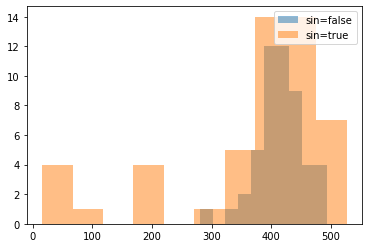

In [22]:
f, ax = plt.subplots(1, 1)
shap_id = 0
bins = np.linspace(0, 120, 20)
ax.hist(dist_sin_train.loc[dist_sin_train['label']==0, shap_id], alpha=0.5, label='sin=false')
ax.hist(dist_sin_train.loc[dist_sin_train['label']==1, shap_id], alpha=0.5, label='sin=true')
ax.legend(loc='upper right')

### Persistence of results

In [ ]:
ts = datetime.datetime.now().strftime('%Y%m%d%H%M%S')
folder = './test_sin_results/'
os.makedirs(folder, exist_ok=True)

dists.to_csv(f'{folder}/test_sin_500_fixed_nonoise_distmatrix_{ts}.csv', header=False, index=False)


with open(f'{folder}/gendis_{ts}.pickle', 'wb') as file_handler:
    pickle.dump(gendis, file_handler, protocol=pickle.HIGHEST_PROTOCOL)